<a href="https://colab.research.google.com/github/beifa/Bengali.AI/blob/master/Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Readme

Цель:
    Оптическое распознавание символов особенно сложно для бенгальцев.

Бенгальский алфавит содержит 49 букв (точнее, 11 гласных и 38 согласных), существует также 18 возможных диакритических знаков, или ударений.

Диакрити́ческие знаки (др.-греч. δια-κρῐτικός — «служащий для различения» от др.-греч. κρῐτῐκός — «способный к различению»):
    в лингвистике — различные надстрочные, подстрочные, реже внутристрочные знаки, применяемые в буквенных (в том числе консонантных) и слоговых системах письма не как самостоятельные обозначения звуков, а для изменения или уточнения значения других знаков.(как я понимяю это какие-то черточки или точки, ударения)


**На этом конкурсе вам дается изображение рукописной бенгальской графемы, и вам необходимо отдельно классифицировать три составляющих элемента изображения:
корень графемы(grapheme root),
гласные диакритические знаки(vowel diacritics) и
согласные диакритические знаки(consonant diacritics).**

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1095143%2Fa9a48686e3f385d9456b59bf2035594c%2Fdesc.png?generation=1576531903599785&alt=media)

Этот набор данных содержит изображения отдельных рукописных бенгальских символов.

Бенгальские символы (графемы) пишутся путем объединения трех компонентов:
* grapheme_root,
* vowel_diacritic
* consonant_diacritic.

Ваша задача состоит в том, чтобы классифицировать компоненты графемы в каждом изображении. Существует около 10 000 возможных графем, из которых около 1000 представлены в обучающей подборке.

**Тестовый набор включает в себя некоторые графемы, которые не существуют в поезде, но не имеют новых компонентов графемы.**

# Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


test.csv

Каждое изображение в тестовом наборе потребует трех строк прогнозов, по одному для каждого компонента. Этот csv указывает точный порядок предоставления вами ярлыков.
- row_id: внешний ключ к отправке образца
- image_id: внешний ключ к файлу паркета 
- компонент: требуемый целевой класс для строки (grapheme_root, vowel_diacritic или consonant_diacritic)

Каждый файл паркета содержит десятки тысяч изображений в оттенках серого размером 137x236. Изображения были предоставлены в формате паркета для ввода / вывода и экономии пространства. Каждая строка в файлах паркета содержит столбец image_id и сплющенное изображение.

In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
        
HEIGHT = 137
WIDTH = 236
PATH = '/content/drive/My Drive/Bengali/data/'
MODEL = '/content/drive/My Drive/Bengali/model/'

In [0]:
cm = pd.read_csv(PATH + "class_map.csv")
test = pd.read_csv(PATH  + "test.csv")
train = pd.read_csv(PATH + "train.csv")
file_train = PATH + 'train_image_data_0.parquet'
file_test = PATH + 'test_image_data_0.parquet'

In [0]:
df = pd.read_parquet(file_train)
df_test = pd.read_parquet(file_test)
df.head()

,image_id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,32292,32293,32294,32295,32296,32297,32298,32299,32300,32301,32302,32303,32304,32305,32306,32307,32308,32309,32310,32311,32312,32313,32314,32315,32316,32317,32318,32319,32320,32321,32322,32323,32324,32325,32326,32327,32328,32329,32330,32331
0,Train_0,254,253,252,253,251,252,253,251,251,253,254,253,253,253,254,253,252,253,253,253,253,252,252,253,253,252,252,253,252,252,252,253,254,253,253,252,252,252,253,...,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,252,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,253,251
1,Train_1,251,244,238,245,248,246,246,247,251,252,250,250,246,249,248,250,249,251,252,253,253,253,253,253,253,253,250,249,251,252,251,251,251,251,252,253,251,250,252,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,254
2,Train_2,251,250,249,250,249,245,247,252,252,252,253,252,252,251,250,251,253,254,251,251,252,252,253,253,252,251,251,249,251,252,252,253,252,251,251,251,250,250,252,...,253,253,252,252,252,253,253,253,253,253,252,251,251,250,250,250,251,251,251,250,250,250,251,252,253,253,253,253,254,254,254,253,252,252,253,253,253,253,251,249
3,Train_3,247,247,249,253,253,252,251,251,250,250,251,250,249,251,251,251,250,252,251,245,245,251,252,251,252,252,250,249,250,251,250,249,250,251,252,253,252,252,252,...,253,252,252,254,253,253,254,253,252,253,254,253,252,253,254,254,254,254,254,254,254,254,253,252,253,254,253,252,253,254,254,254,254,254,254,253,253,252,251,252
4,Train_4,249,248,246,246,248,244,242,242,229,225,231,229,229,228,221,224,226,221,221,220,217,217,218,219,222,224,214,218,227,227,227,228,224,231,235,235,233,212,183,...,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255,255


## Look for img train

(1, 137, 236)


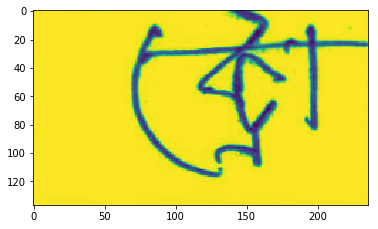

In [0]:
img0 = df.iloc[0, 1:].values.reshape(-1, HEIGHT, WIDTH)
print(img0.shape)
plt.imshow(img0.astype('float')[0], );

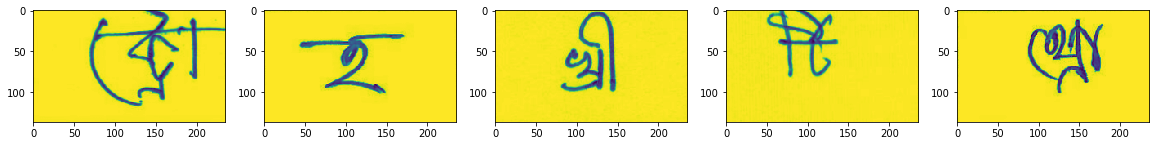

In [0]:
img5 = df.iloc[:5, 1:].values.reshape(-1, HEIGHT, WIDTH)
f, ax = plt.subplots(1, 5, figsize=(20, 10))
for i in range(5):
    ax[i].imshow(img5[i])

##Look for img test

(1, 137, 236)


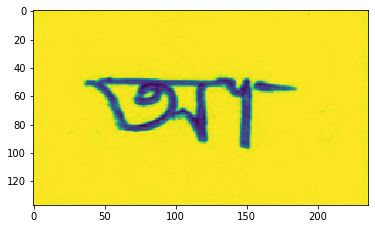

In [0]:
img0 = df_test.iloc[0, 1:].values.reshape(-1, HEIGHT, WIDTH)
print(img0.shape)
plt.imshow(img0.astype('float')[0], );

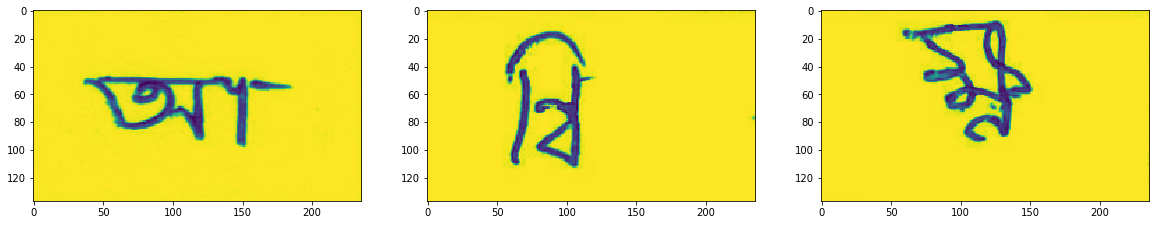

In [0]:
img5 = df_test.iloc[:3, 1:].values.reshape(-1, HEIGHT, WIDTH)
f, ax = plt.subplots(1, 3, figsize=(20, 10))
for i in range(3):
    ax[i].imshow(img5[i])

## Und Labels

In [0]:
train.head()

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
0,Train_0,15,9,5,ক্ট্রো
1,Train_1,159,0,0,হ
2,Train_2,22,3,5,খ্রী
3,Train_3,53,2,2,র্টি
4,Train_4,71,9,5,থ্রো


Тут нужно понимать что grapheme в трайне это не что иное как картинка

а три колонки перед ней это то что нужно предсказать

Вот так выглядит предикт:

    0	Test_0_consonant_diacritic	0
    1	Test_0_grapheme_root	3
    2	Test_0_vowel_diacritic	0

у нас для каждой картинки три значения

In [0]:
168*11*7

12936

## Other

In [0]:
cm[cm.component_type == 'vowel_diacritic']

,component_type,label,component
168,vowel_diacritic,0,0
169,vowel_diacritic,1,া
170,vowel_diacritic,2,ি
171,vowel_diacritic,3,ী
172,vowel_diacritic,4,ু
173,vowel_diacritic,5,ূ
174,vowel_diacritic,6,ৃ
175,vowel_diacritic,7,ে
176,vowel_diacritic,8,ৈ
177,vowel_diacritic,9,ো


In [0]:
cm[cm.component_type == 'consonant_diacritic']

,component_type,label,component
179,consonant_diacritic,0,0
180,consonant_diacritic,1,ঁ
181,consonant_diacritic,2,র্
182,consonant_diacritic,3,র্য
183,consonant_diacritic,4,্য
184,consonant_diacritic,5,্র
185,consonant_diacritic,6,্র্য


Так  утро прошло не зря я допер че надо делать :(((

У нас есть изображение рукописных так сказать символов
и нам нужно разделить их на 3 части

Трайн состоит из 200840 сторок что соответствует картинкам
картинки же упакованы по 50к по 4 пакета

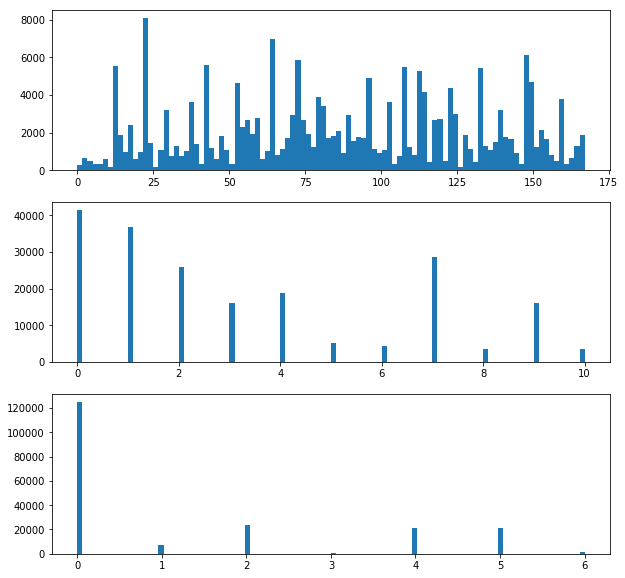

In [0]:
grapheme = ['grapheme_root', 'vowel_diacritic', 'consonant_diacritic']
f, ax = plt.subplots(3, 1, figsize=(10, 10))
for i in range(3):
    ax[i].hist(train[grapheme[i]], bins = 100 )

In [0]:
train[(train.vowel_diacritic == 0) & (train.consonant_diacritic == 0)]

,image_id,grapheme_root,vowel_diacritic,consonant_diacritic,grapheme
1,Train_1,159,0,0,হ
8,Train_8,67,0,0,ত্থ
24,Train_24,142,0,0,ষ্ঠ
29,Train_29,160,0,0,হ্ন
33,Train_33,44,0,0,জ্জ
...,...,...,...,...,...
200790,Train_200790,76,0,0,দ্ব
200795,Train_200795,105,0,0,ফ্ফ
200801,Train_200801,4,0,0,ই
200802,Train_200802,137,0,0,শ্ম
